<a href="https://colab.research.google.com/github/kitlapp/AzureDatabricksPersonal/blob/notes/EnvironmentSetup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up the Cloud Environment
This notebook provides instructions covering all the core steps required to set up a personal cloud environment. These steps include:

1. Creating an Azure free account

2. Launching an Azure Databricks workspace

3. Creating at least one single-node cluster, ensuring node availability in a supported region

4. Linking the Databricks workspace to GitHub

5. Ensuring that Unity Catalog is enabled (requires access to an admin account with admin privileges)

6. Linking Databricks to external cloud storage (data lakes)

## 1. Creating an Azure Free Account
1. Go to [Azure Free Account Signup](https://azure.microsoft.com/en-us/pricing/purchase-options/azure-account)

2. Click "Try Azure for Free"

3. For a fresh account, click "Create one" to make a new Microsoft email. Fill in your date of birth, country/region, and first and last name. Complete the Microsoft account creation.  
Note: Microsoft allows multiple accounts with the same first and last name.

4. You will now be prompted with a new menu related to the Azure Free Account setup. Choose "For personal use" and fill in the remaining required fields.  
Note: You will likely need a mobile phone number that has not been used before for an Azure free account.

5. Enter payment information with a debit card that has not been used before for another Azure free account.  
Note: Along with the phone number, this is a strict requirement. Microsoft will usually reject a debit card already linked to another free Azure account.





## 2 & 3. Launching an Azure Databricks Workspace and a Cluster
1. After completing the new Azure Free Account setup, go to [Azure Portal](https://azure.microsoft.com/en-us/get-started/azure-portal) and sign in with your newly created Microsoft credentials.

2. Choose "Create a resource", which is the first option after clicking the three horizontal lines (menu icon).

3. Find Azure Databricks and click "Create".

4. Leave Subscription as it is. Name the resource group with a name followed by "rg". Name the workspace with the same name but use "ws" instead of "rg". Choose France Central if you are in Greece. Germany West Central did not have available nodes. According to the instructor, UK South will work as well, but I did not try this. Also, select the Premium pricing tier for Azure Databricks.

5. Next (Networking): Do not pick "Yes" for anything.

6. Next (Encryption): Do not select anything.

7. Next (Security & Compliance): Do not select anything.

8. Next (Tags): Do not fill in anything.

9. Finally, click "Review + Create". If validation succeeds, click "Create".

10. Once the deployment is completed, click "Go to resource", then click "Launch Workspace".




## 4. Linking the Databricks Workspace to GitHub
1. Click your profile (top right menu) → Settings → Linked Accounts

2. Select GitHub as the Git provider → Link Git account → Click Link

3. Sign in to your GitHub account. After a successful sign-in, your GitHub account is now linked with Databricks.

4. Open GitHub in a new browser tab and create a new repository to host your project.

5. Navigate to the [Databricks GitHub App](https://github.com/apps/databricks) (if you haven’t installed it yet) → Install → Choose Only select repositories → Expand the Select repositories option and select the newly created repository → Install.

6. Copy the URL of the repository.

7. Go to the Databricks workspace → Click Workspace → Navigate to Home and find the folder where you want to create the Git folder. Once decided, right-click → Create → Git Folder → Paste the copied URL → Choose GitHub as the Git provider → Create Git Folder.

8. You will now see README.md inside your Git folder in Databricks.

Databricks includes an embedded Git UI, which you can access from your Databricks Git folder by opening it and clicking the Git branch diagram icon next to the folder name. The Databricks Git UI is powerful and easy to use as you can create a new branch, commit and push changes made in Databricks with a message to your origin GitHub repository. It also lets you navigate to the original GitHub repository by displaying a suggestion at the top of the Git UI to create a pull request. You can click 'Pull request' to open it and then merge your changes into the main branch.

Be careful to push changes from your working branch, not directly from the main branch, on GitHub.





## 5. Ensuring that Unity Catalog is Enabled
To enable Unity Catalog Metastore, you need an Azure subscription with global administrator privileges. You can create such a subscription by setting up an Azure Free Account following the instructions in Section 1 of this guide.

When you create an Azure Databricks resource under this subscription and launch a cluster in a supported region (as described in Section 2 & 3), the Databricks workspace will automatically be assigned to a Unity Catalog Metastore by default provided that the subscription was created after November 2023.

To verify this, start the already created cluster, create a new notebook, set the language to SQL, and run the command: "SELECT current_metastore();".

If your workspace is assigned to a Unity Catalog Metastore, the SQL output should look similar to the example shown in the image below.


In [ ]:
# Add files to Google Colab runtime by uploading from your local machine
from google.colab import files
files.upload()

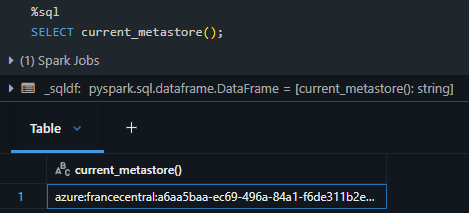

In [ ]:
# Display the uploaded image named 'uncat.png' in the output cell
from IPython.display import Image
Image('uncat.png')

From the above image, it can be seen that Unity Catalog Metastore is enabled for my subscription in the France Central region. This means that any workspace created in this region is automatically assigned to a Unity Catalog Metastore.

Another option to check whether Unity Catalog is enabled for a specific cluster is to click Compute, open the cluster of interest, and check the summary in the top-right menu. If Unity Catalog is enabled for the cluster, it can be seen there, as shown in the image below:

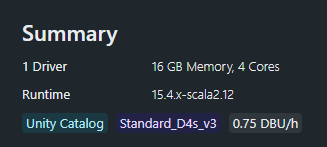

In [2]:
# Display the uploaded image named 'uncat2.png' in the output cell
from IPython.display import Image
Image('uncat2.png')

Note that Unity Catalog is not supported for Access mode: No isolation shared. Therefore, avoid changing the Access mode option later for the same cluster, as this will cause Unity Catalog to disappear from the summary in the top-right menu. Additionally, enabling Credential passthrough from the advanced options will also cause Unity Catalog to disappear, although this option has been deprecated anyway. The third and final option that will cause Unity Catalog to disappear is choosing a runtime version older than 11.3.

## 6. Linking Databricks to Data Lakes